In [8]:
!pip install tensorflow-gpu

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=2176b027054644fc6f7f5489aa75745f9642bbc765194e04c52051ab3c350e0a
  Stored in directory: c:\users\shomer\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [11]:
import pandas as pd, matplotlib.pyplot as plt , seaborn as sns, numpy as np, tensorflow as tf

# Loading the data

In [12]:
list_of_df= ['x_train' , 'y_train',
                    'x_test' , 'y_test',
                    'x_val' , 'y_val']

for i, frame in enumerate(list_of_df):
    list_of_df[i]= pd.read_csv( f'content/{list_of_df[i]}.csv').fillna('ffill')

In [13]:
x_train , y_train, x_test , y_test, x_val , y_val = list_of_df
            

In [14]:
y_train.head()

,timestamp,meter_reading
0,2016-01-01,0.277567
1,2016-01-02,0.208450
2,2016-01-03,0.251776
3,2016-01-04,0.397767
4,2016-01-05,0.382355


In [15]:
window_size= 6
train_gen= tf.keras.preprocessing.sequence.TimeseriesGenerator(np.array(x_train.iloc[:,1:]), 
                                                               np.array(y_train.iloc[:,1:]) , 
                                                                length=6 ,sampling_rate=1, 
                                                                stride=1, batch_size=64
                                                                )

val_gen= tf.keras.preprocessing.sequence.TimeseriesGenerator(np.array(x_val.iloc[:,1:]), 
                                                               np.array(y_val.iloc[:,1:]) , 
                                                                length=6 ,sampling_rate=1, 
                                                                stride=1, batch_size=64
                                                                )

test_gen= tf.keras.preprocessing.sequence.TimeseriesGenerator(np.array(x_test.iloc[:,1:]), 
                                                               np.array(y_test.iloc[:,1:]) , 
                                                                length=6 ,sampling_rate=1, 
                                                                stride=1, batch_size=64
                                                                )

In [16]:
model= tf.keras.Sequential([  tf.keras.layers.LSTM( 128 , activation='tanh' ),
        tf.keras.layers.Dense(1) ] )

In [17]:
model.compile(loss='mae', optimizer='adam')

# Fitting the model
history = model.fit(train_gen, validation_data=val_gen, epochs=30)

Epoch 1/30
5/5 [==============================] - 2s 72ms/step - loss: 0.4588 - val_loss: 0.2885
Epoch 2/30
5/5 [==============================] - 0s 12ms/step - loss: 0.2652 - val_loss: 0.1676
Epoch 3/30
5/5 [==============================] - 0s 12ms/step - loss: 0.2157 - val_loss: 0.1270
Epoch 4/30
5/5 [==============================] - 0s 11ms/step - loss: 0.1608 - val_loss: 0.1369
Epoch 5/30
5/5 [==============================] - 0s 10ms/step - loss: 0.1684 - val_loss: 0.1548
Epoch 6/30
5/5 [==============================] - 0s 12ms/step - loss: 0.1561 - val_loss: 0.1377
Epoch 7/30
5/5 [==============================] - 0s 11ms/step - loss: 0.1846 - val_loss: 0.1099
Epoch 8/30
5/5 [==============================] - 0s 11ms/step - loss: 0.1639 - val_loss: 0.1221
Epoch 9/30
5/5 [==============================] - 0s 10ms/step - loss: 0.1545 - val_loss: 0.1230
Epoch 10/30
5/5 [==============================] - 0s 10ms/step - loss: 0.1503 - val_loss: 0.1259
Epoch 11/30
5/5 [============

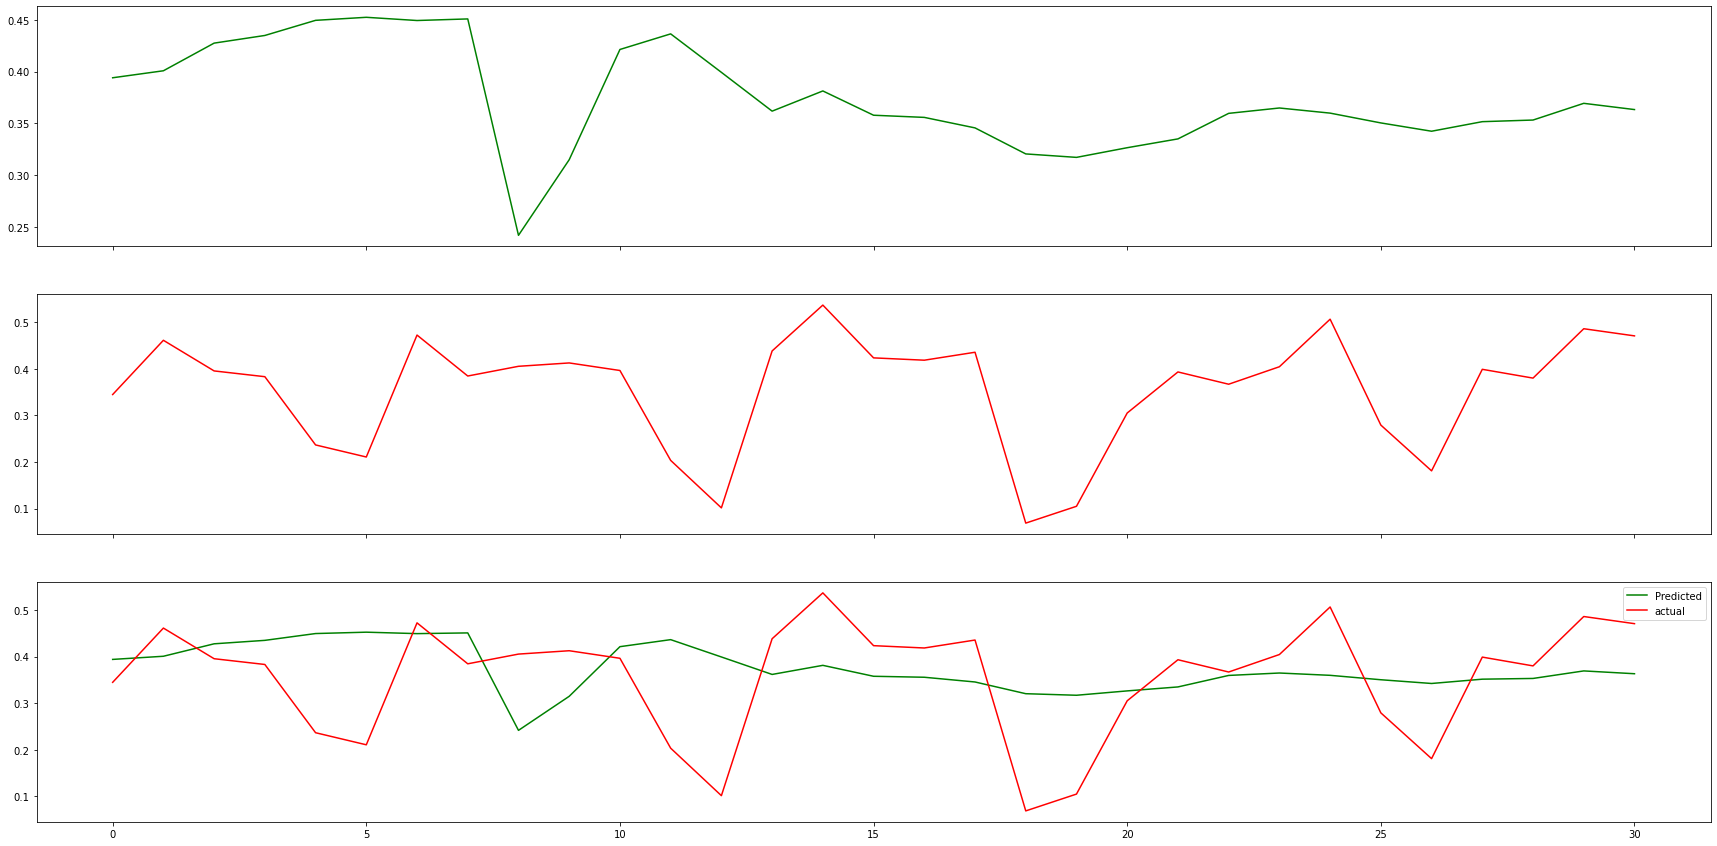

In [18]:
predicted_t=[]
actual_t=[]

predicted_t.extend(model.predict(test_gen[0][0] )  )
actual_t.extend( test_gen[0][1])  
    
fig , (ax1 , ax2, ax) = plt.subplots( 3,1 ,  figsize=(30,15), sharex=True )

ax1.plot(range(len(actual_t)) ,
         predicted_t,
         color='green')

ax2.plot( range(len(actual_t)) ,
          actual_t,
          color='red')


ax.plot(range(len(actual_t)) ,
         predicted_t,
         color='green',
           label='Predicted')

ax.plot( range(len(actual_t)) ,
          actual_t,
          color='red',
           label='actual')

plt.legend()


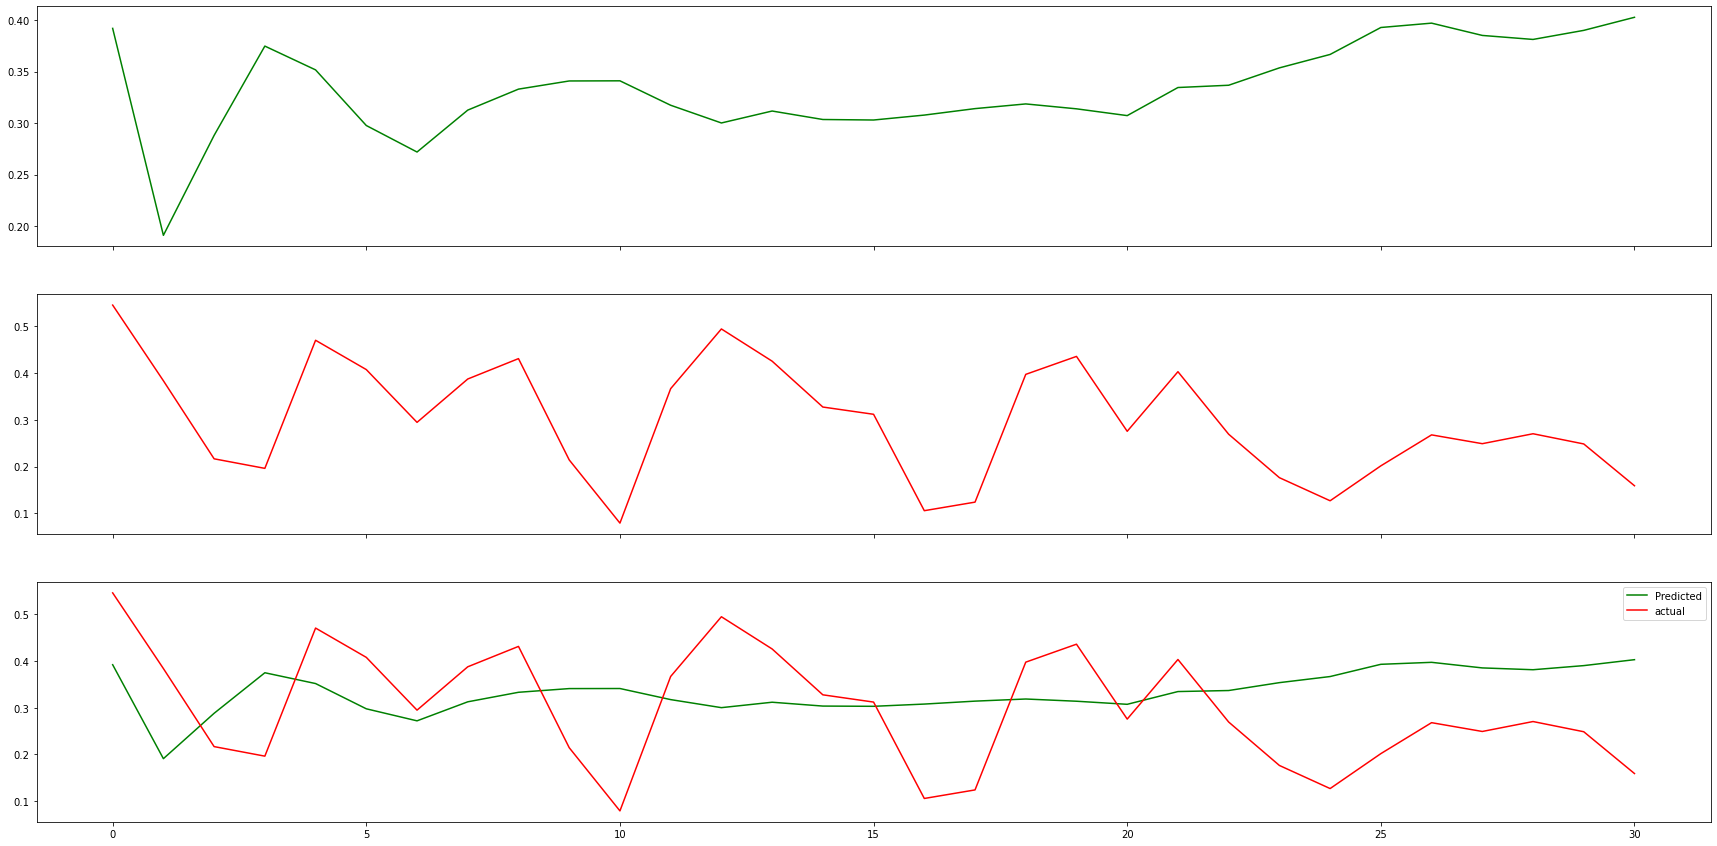

In [19]:
predicted_t=[]
actual_t=[]

predicted_t.extend(model.predict(val_gen[0][0] )  )
actual_t.extend( val_gen[0][1])  
    
fig , (ax1 , ax2, ax) = plt.subplots( 3,1 ,  figsize=(30,15), sharex=True )

ax1.plot(range(len(actual_t)) ,
         predicted_t,
         color='green')

ax2.plot( range(len(actual_t)) ,
          actual_t,
          color='red')


ax.plot(range(len(actual_t)) ,
         predicted_t,
         color='green',
           label='Predicted')

ax.plot( range(len(actual_t)) ,
          actual_t,
          color='red',
           label='actual')

plt.legend()
